<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(_1_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.6_n250.csv',
 'data_add_delta_-1.6_n120.csv',
 'data_add_delta_-1.6_n60.csv',
 'data_add_delta_-1.6_n30.csv',
 'data_add_delta_-1.6_n20.csv']

In [17]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.475041,95.835318,62.676240,76.011387,0.019744,265.017730,264.995332,0.022398
1,0.0,1.0,62.984177,48.069450,61.695244,26.311748,-0.052337,209.008281,209.054671,-0.046389
2,0.0,2.0,64.570458,38.610275,91.034614,63.765552,-0.072641,267.908259,267.963567,-0.055307
3,0.0,3.0,61.130528,23.324121,29.243780,64.166993,-0.016801,187.848621,187.865824,-0.017204
4,0.0,4.0,72.516059,30.321244,98.412879,39.392405,-0.033629,250.608957,250.621166,-0.012209
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,45.164424,28.958457,60.228817,34.562360,0.064147,178.978205,178.952108,0.026097
19996,999.0,16.0,98.837682,35.390402,50.544962,76.012608,-0.071311,270.714343,270.795760,-0.081418
19997,999.0,17.0,79.840311,23.492807,20.635752,85.697041,-0.029368,219.636543,219.670347,-0.033804
19998,999.0,18.0,63.595786,97.341125,64.988305,48.720863,-0.003624,284.642455,284.646649,-0.004194


In [18]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.475041,95.835318,62.676240,76.011387,0.019744,265.017730,264.995332,0.022398
1,0.0,1.0,62.984177,48.069450,61.695244,26.311748,-0.052337,209.008281,209.054671,-0.046389
2,0.0,2.0,64.570458,38.610275,91.034614,63.765552,-0.072641,267.908259,267.963567,-0.055307
3,0.0,3.0,61.130528,23.324121,29.243780,64.166993,-0.016801,187.848621,187.865824,-0.017204
4,0.0,4.0,72.516059,30.321244,98.412879,39.392405,-0.033629,250.608957,250.621166,-0.012209
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,45.164424,28.958457,60.228817,34.562360,0.064147,178.978205,178.952108,0.026097
19996,999.0,16.0,98.837682,35.390402,50.544962,76.012608,-0.071311,270.714343,270.795760,-0.081418
19997,999.0,17.0,79.840311,23.492807,20.635752,85.697041,-0.029368,219.636543,219.670347,-0.033804
19998,999.0,18.0,63.595786,97.341125,64.988305,48.720863,-0.003624,284.642455,284.646649,-0.004194


In [19]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y       y_hat     e_hat
rep   index                                                                                        
0.0   0.0    20.475041  95.835318  62.676240  76.011387  0.019744  265.017730  264.995332  0.022398
      1.0    62.984177  48.069450  61.695244  26.311748 -0.052337  209.008281  209.054671 -0.046389
      2.0    64.570458  38.610275  91.034614  63.765552 -0.072641  267.908259  267.963567 -0.055307
      3.0    61.130528  23.324121  29.243780  64.166993 -0.016801  187.848621  187.865824 -0.017204
      4.0    72.516059  30.321244  98.412879  39.392405 -0.033629  250.608957  250.621166 -0.012209
...                ...        ...        ...        ...       ...         ...         ...       ...
999.0 15.0   45.164424  28.958457  60.228817  34.562360  0.064147  178.978205  178.952108  0.026097
      16.0   98.837682  35.390402  50.544962  76.012608 -0.071311  270.714343  270.795760 -0.081418
      17.0   79.840311  23.492807  20.635752  85.697041 -0.029368  219.636543  219.670347 -0.033804
      18.0   63.595786  97.341125  64.988305  48.720863 -0.003624  284.642455  284.646649 -0.004194
      19.0   43.853947  51.462716  71.656010  81.276746  0.017826  258.267244  258.274582 -0.007338

[20000 rows x 8 columns]

In [20]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y       y_hat     e_hat
rep   index                                                                                        
0.0   0.0    20.475041  95.835318  62.676240  76.011387  0.019744  265.017730  264.995332  0.022398
      1.0    62.984177  48.069450  61.695244  26.311748 -0.052337  209.008281  209.054671 -0.046389
      2.0    64.570458  38.610275  91.034614  63.765552 -0.072641  267.908259  267.963567 -0.055307
      3.0    61.130528  23.324121  29.243780  64.166993 -0.016801  187.848621  187.865824 -0.017204
      4.0    72.516059  30.321244  98.412879  39.392405 -0.033629  250.608957  250.621166 -0.012209
...                ...        ...        ...        ...       ...         ...         ...       ...
999.0 15.0   45.164424  28.958457  60.228817  34.562360  0.064147  178.978205  178.952108  0.026097
      16.0   98.837682  35.390402  50.544962  76.012608 -0.071311  270.714343  270.795760 -0.081418
      17.0   79.840311  23.492807  20.635752  85.697041 -0.029368  219.636543  219.670347 -0.033804
      18.0   63.595786  97.341125  64.988305  48.720863 -0.003624  284.642455  284.646649 -0.004194
      19.0   43.853947  51.462716  71.656010  81.276746  0.017826  258.267244  258.274582 -0.007338

[20000 rows x 8 columns]

In [21]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.475041,95.835318,62.676240,76.011387,0.019744,265.017730,264.995332,0.022398
1,0.0,1.0,62.984177,48.069450,61.695244,26.311748,-0.052337,209.008281,209.054671,-0.046389
2,0.0,2.0,64.570458,38.610275,91.034614,63.765552,-0.072641,267.908259,267.963567,-0.055307
3,0.0,3.0,61.130528,23.324121,29.243780,64.166993,-0.016801,187.848621,187.865824,-0.017204
4,0.0,4.0,72.516059,30.321244,98.412879,39.392405,-0.033629,250.608957,250.621166,-0.012209
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,45.164424,28.958457,60.228817,34.562360,0.064147,178.978205,178.952108,0.026097
19996,999.0,16.0,98.837682,35.390402,50.544962,76.012608,-0.071311,270.714343,270.795760,-0.081418
19997,999.0,17.0,79.840311,23.492807,20.635752,85.697041,-0.029368,219.636543,219.670347,-0.033804
19998,999.0,18.0,63.595786,97.341125,64.988305,48.720863,-0.003624,284.642455,284.646649,-0.004194


In [22]:
table.set_index(['rep', 'index'], inplace=True)

In [23]:
table

x1         x2         x3         x4         e           Y       y_hat     e_hat
rep   index                                                                                        
0.0   0.0    20.475041  95.835318  62.676240  76.011387  0.019744  265.017730  264.995332  0.022398
      1.0    62.984177  48.069450  61.695244  26.311748 -0.052337  209.008281  209.054671 -0.046389
      2.0    64.570458  38.610275  91.034614  63.765552 -0.072641  267.908259  267.963567 -0.055307
      3.0    61.130528  23.324121  29.243780  64.166993 -0.016801  187.848621  187.865824 -0.017204
      4.0    72.516059  30.321244  98.412879  39.392405 -0.033629  250.608957  250.621166 -0.012209
...                ...        ...        ...        ...       ...         ...         ...       ...
999.0 15.0   45.164424  28.958457  60.228817  34.562360  0.064147  178.978205  178.952108  0.026097
      16.0   98.837682  35.390402  50.544962  76.012608 -0.071311  270.714343  270.795760 -0.081418
      17.0   79.840311  23.492807  20.635752  85.697041 -0.029368  219.636543  219.670347 -0.033804
      18.0   63.595786  97.341125  64.988305  48.720863 -0.003624  284.642455  284.646649 -0.004194
      19.0   43.853947  51.462716  71.656010  81.276746  0.017826  258.267244  258.274582 -0.007338

[20000 rows x 8 columns]

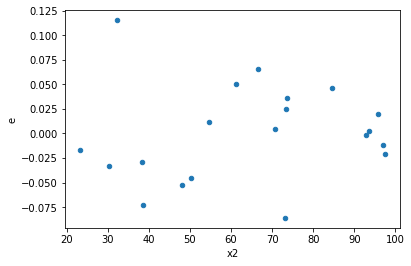

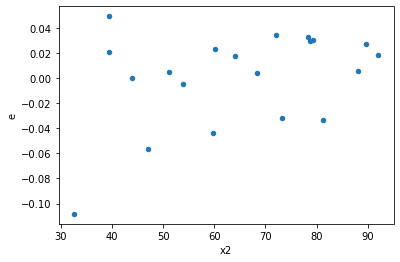

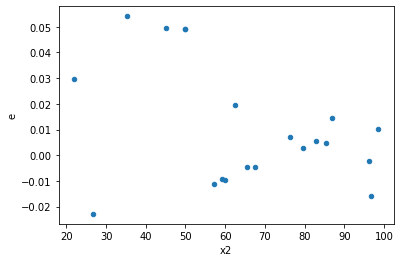

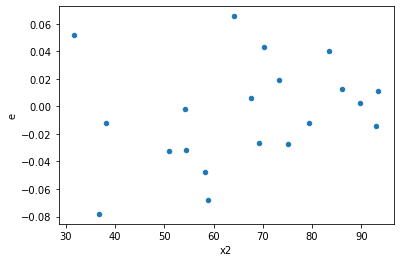

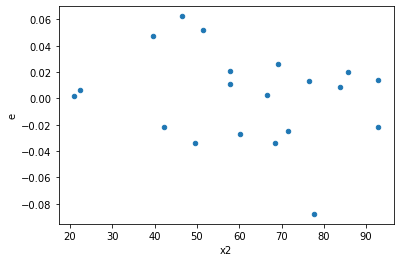

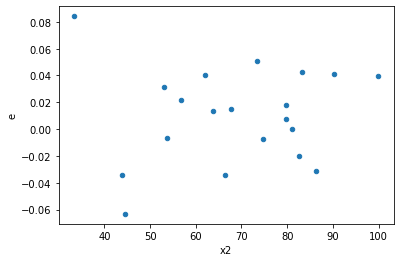

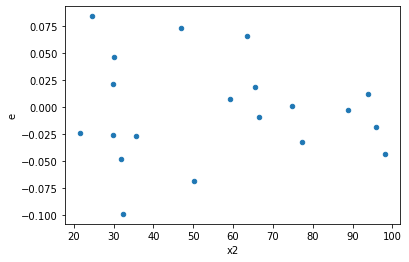

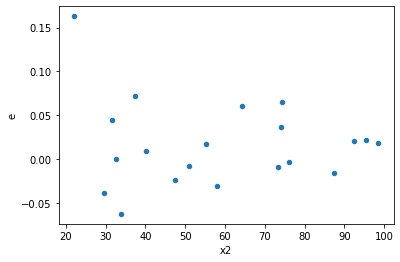

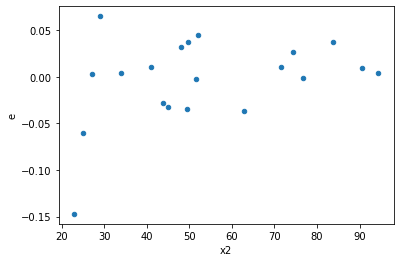

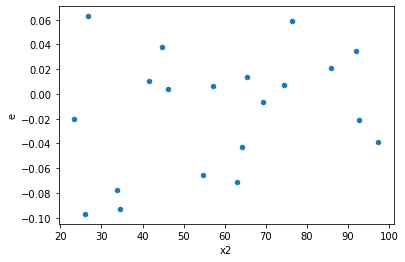

In [24]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [25]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [26]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,4.0,4.0,0.002829512438091625,0.0031032567225669832,0.0007073781095229063,0.0007758141806417458,1.09674609688586,0.9308375203707904,0.5345812398146048,0.4654187601853952,Reject001=1 : Homoscedasticity
30.0,4.0,4.0,0.0030238455219584676,0.004468744994173572,0.0007559613804896169,0.001117186248543393,1.4778350817601553,0.7143201379511015,0.6428399310244493,0.35716006897555075,Reject001=1 : Homoscedasticity
33.0,4.0,4.0,0.0021069755784603765,0.0032968696296569386,0.0005267438946150941,0.0008242174074142346,1.564740314677045,0.6750471603605086,0.6624764198197457,0.3375235801802543,Reject001=1 : Homoscedasticity
34.0,4.0,4.0,0.000999625803545539,0.003615071546451474,0.00024990645088638475,0.0009037678866128685,3.61642479978938,0.240882059770698,0.879558970114651,0.120441029885349,Reject001=1 : Homoscedasticity
35.0,4.0,4.0,0.001290239019542531,0.0036175016084493755,0.0003225597548856328,0.0009043754021123439,2.8037453166871376,0.3420128043076587,0.8289935978461707,0.17100640215382934,Reject001=1 : Homoscedasticity
41.0,4.0,4.0,0.0014928944265143972,0.0026500546306395074,0.0003732236066285993,0.0006625136576598769,1.775111879027402,0.5919323581310674,0.7040338209344663,0.2959661790655337,Reject001=1 : Homoscedasticity
43.0,4.0,4.0,0.0018306130133473656,0.003924001487477769,0.0004576532533368414,0.0009810003718694422,2.143545063247715,0.4784062716336799,0.7607968641831601,0.23920313581683994,Reject001=1 : Homoscedasticity
48.0,4.0,4.0,0.00034406316015577165,0.001368563799518492,8.601579003894291e-05,0.000342140949879623,3.9776528207753667,0.2097268680452271,0.8951365659773864,0.10486343402261356,Reject001=1 : Homoscedasticity
49.0,4.0,4.0,0.0016050044188951355,0.0034145529940302023,0.0004012511047237839,0.0008536382485075506,2.1274414910213997,0.48267582183151236,0.7586620890842438,0.24133791091575618,Reject001=1 : Homoscedasticity


In [27]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,0.004019826369408322,0.001575140557077032,0.0010049565923520806,0.000393785139269258,0.39184293358145134,0.3862949943937838,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,0.002829512438091625,0.0031032567225669832,0.0007073781095229063,0.0007758141806417458,1.09674609688586,0.9308375203707904,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,0.005814304300857024,0.00010458741355768848,0.001453576075214256,2.614685338942212e-05,0.0179879497435785,0.0018513260693211187,Reject001=0 : Heteroscedasticity
3.0,4.0,4.0,0.004570593944593282,0.0005242659663325684,0.0011426484861483204,0.0001310664915831421,0.11470412219679706,0.05917333179775964,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,0.007403275286983405,0.006255477170942703,0.0018508188217458512,0.0015638692927356758,0.8449607678295059,0.8742458742603579,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,0.009198178001305662,0.0015343521955824095,0.0022995445003264154,0.0003835880488956024,0.16681044826101554,0.11094242013883253,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,0.014608709022023516,0.0006995617866729259,0.003652177255505879,0.00017489044666823148,0.04788662609531712,0.012148268720696504,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,0.023626029301818362,0.004305640594356981,0.0059065073254545904,0.0010764101485892452,0.1822413973737686,0.1279200742302994,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,0.011560921311599238,0.002839193649863469,0.0028902303278998094,0.0007097984124658672,0.24558541428829425,0.20258516343391855,Reject001=1 : Homoscedasticity


In [28]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      893
Reject001=0 : Heteroscedasticity    107
Name: Result_test, dtype: int64